In [6]:
from mylib.statistic_test import *

code_id = '0344 - Convergent Dynamics'
loc = os.path.join(figpath, code_id)
mkdir(loc)

with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    template_seq = pickle.load(handle)

from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import FeatureKnockOut

with open(r"E:\Data\FinalResults\0346 - GLM for all sessions\10224_MA_iter0.pkl", 'rb') as handle:
    models = pickle.load(handle)

M53: ContinuousHiddenStateModel = models[0][-5]

def func(M53 = M53):
    simu_reg, simu_identity, predicted_prob = M53.simulate_across_day(n_step=200, n_fields=10000, is_noise=True)
    """
    predicted_prob = np.zeros((simu_reg.shape[0], simu_reg.shape[1]-1)) * np.nan

    for i in range(simu_reg.shape[0]):
        idx = np.where(simu_reg[i, :] == 1)[0][0]
        predicted_prob[i, idx:] = M53.get_predicted_prob([simu_reg[i, idx:]], is_noise=True)[0]

    predicted_prob *= simu_identity[:, 1:]
    """
    return predicted_prob, simu_reg, simu_identity

datasaveloc = join(figdata, code_id)
mkdir(datasaveloc)

if exists(join(datasaveloc, ' [General].pkl')):
    with open(join(datasaveloc, '[General].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = {
        "Iteration": [],
        "Step": [],
        "P": [],
        "PMF": [],
        "MiceID": [],
        "Paradigm": []
    }
    """
    for j in range(5):
        predicted_prob, simu_reg, simu_identity = func()
        with open(join(datasaveloc, f'SFER_Poly2_Simulations_iter{j}.pkl'), 'wb') as handle:
            pickle.dump((predicted_prob, simu_reg, simu_identity), handle)   

        mat = np.zeros((40, 199), np.float64)
        for i in tqdm(range(199)):
            mat[:, i] = np.histogram(
                predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                range=(1e-10, 1),
                bins=40,
                density=True
            )[0] 
            Data["Iteration"].append(np.repeat(j, 40))
            Data["Step"].append(np.repeat(i, 40))
            Data["P"].append(np.linspace(0, 1, 40))
            Data["PMF"].append(mat[:, i] / np.sum(mat[:, i]))
             
    """
    for j in range(len(f_CellReg_modi)):
        if f_CellReg_modi['Type'][j] != 'Real' or f_CellReg_modi['maze_type'][j] == 0:
            continue
        
        mouse = int(f_CellReg_modi['MiceID'][j])
        if f_CellReg_modi['paradigm'][j] == 'CrossMaze':
            paradigm = 'MA' if f_CellReg_modi['maze_type'][j] == 1 else 'MB'
            
            with open(join(figpath, "0346 - GLM for all sessions", f"{mouse}_{paradigm}_iter0.pkl"), 'rb') as handle:
                models, _ = pickle.load(handle)
                M53: ContinuousHiddenStateModel = models[-5]
            
            for k in range(1):
                print(f"Iteration Time: {mouse}, {paradigm} | Iteration {k}")
                #predicted_prob, simu_reg, simu_identity = func(M53=M53)
            
                with open(join(datasaveloc, f'SFER_Poly2_Simulations_{mouse}_{paradigm}_iter{k}.pkl'), 'rb') as handle:
                    #pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
                    predicted_prob, simu_reg, simu_identity = pickle.load(handle)

                mat = np.zeros((40, 199), np.float64)
                for i in tqdm(range(199)):
                    mat[:, i] = np.histogram(
                        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                        range=(1e-10, 1),
                        bins=40,
                        density=True
                    )[0]
        
                    Data["Iteration"].append(np.repeat(j, 40))
                    Data["Step"].append(np.repeat(i, 40))
                    Data["P"].append(np.linspace(0, 1, 40))
                    Data["PMF"].append(mat[:, i] / np.sum(mat[:, i]))
                    Data["MiceID"].append(np.repeat(mouse, 40))
                    Data["Paradigm"].append(np.repeat(paradigm, 40))
        else:
            for i in ["cis", "trs"]:
                if f_CellReg_modi['paradigm'][j] == 'ReverseMaze':
                    paradigm = 'MAf' if i == 'cis' else "MAb"
                else:
                    paradigm = 'HPf' if i == 'cis' else "HPb"

                with open(join(figpath, "0346 - GLM for all sessions", f"{mouse}_{paradigm}_iter0.pkl"), 'rb') as handle:
                    models, _ = pickle.load(handle)
                    M53: ContinuousHiddenStateModel = models[-5]
                
                for k in range(1):
                    print(f"Iteration Time: {mouse}, {paradigm} | Iteration {k}")
                    #predicted_prob, simu_reg, simu_identity = func(M53=M53)
            
                    with open(join(datasaveloc, f'SFER_Poly2_Simulations_{mouse}_{paradigm}_iter{k}.pkl'), 'rb') as handle:
                        #pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
                        predicted_prob, simu_reg, simu_identity = pickle.load(handle)

                    mat = np.zeros((40, 199), np.float64)
                    for i in tqdm(range(199)):
                        mat[:, i] = np.histogram(
                            predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                            range=(1e-10, 1),
                            bins=40,
                            density=True
                        )[0]
        
                        Data["Iteration"].append(np.repeat(j, 40))
                        Data["Step"].append(np.repeat(i, 40))
                        Data["P"].append(np.linspace(0, 1, 40))
                        Data["PMF"].append(mat[:, i] / np.sum(mat[:, i]))                
                        Data["MiceID"].append(np.repeat(mouse, 40))
                        Data["Paradigm"].append(np.repeat(paradigm, 40))
    
    for k in Data.keys():
        Data[k] = np.concatenate(Data[k])
        
    with open(join(datasaveloc, '[General].pkl'), 'wb') as handle:
        pickle.dump(Data, handle)
    
    D = pd.DataFrame(Data)
    D.to_excel(join(datasaveloc, '[General].xlsx'), index=False)

        E:\Data\FinalResults\0344 - Convergent Dynamics is already existed!
        E:\Data\FigData\0344 - Convergent Dynamics is already existed!
Iteration Time: 10209, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 725.56it/s]


Iteration Time: 10209, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 682.68it/s]


Iteration Time: 10209, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 735.25it/s]


Iteration Time: 10212, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1605.41it/s]


Iteration Time: 10212, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1436.28it/s]


Iteration Time: 10212, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 753.82it/s]


Iteration Time: 10224, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 493.70it/s]


Iteration Time: 10224, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 410.10it/s]


Iteration Time: 10227, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 397.90it/s]


Iteration Time: 10227, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 431.91it/s]


Iteration Time: 10209, HPf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 543.59it/s]


Iteration Time: 10209, HPb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 486.60it/s]


Iteration Time: 10212, HPf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1225.75it/s]


Iteration Time: 10212, HPb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 688.72it/s]


Iteration Time: 10224, HPf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1194.20it/s]


Iteration Time: 10224, HPb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 661.73it/s]


Iteration Time: 10227, HPf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 487.73it/s]


Iteration Time: 10227, HPb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 475.45it/s]


Iteration Time: 10209, MAf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 501.61it/s]


Iteration Time: 10209, MAb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 440.74it/s]


Iteration Time: 10212, MAf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1327.73it/s]


Iteration Time: 10212, MAb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1095.81it/s]


Iteration Time: 10224, MAf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1214.57it/s]


Iteration Time: 10224, MAb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 751.66it/s]


Iteration Time: 10227, MAf | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1119.41it/s]


Iteration Time: 10227, MAb | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 651.96it/s]


# Evolution of Three Peaks

In [7]:
n_steps = np.max(Data['Step']) + 1

res = {"Step": [], "PMF": [], "Peak Type": []}
line = np.zeros((n_steps, 3))
for j in np.unique(Data['Iteration']):
    for i in range(0, n_steps):
        idx1 = np.where((Data['Iteration'] == j)&(Data['Step'] == i)&(Data['P'] <= 0.2))[0]
        idx2 = np.where((Data['Iteration'] == j)&(Data['Step'] == i)&(Data['P'] < 0.6)&(Data['P'] >= 0.4))[0]
        idx3 = np.where((Data['Iteration'] == j)&(Data['Step'] == i)&(Data['P'] >= 0.8))[0]
        a = np.max(Data['PMF'][idx1])
        b = np.max(Data['PMF'][idx2])
        c = np.max(Data['PMF'][idx3])
        res['Step'].append(np.repeat(i, 3))
        res['PMF'].append(np.array([a, b, c]))
        res['Peak Type'].append(np.array(["Low", "New", "Stable"]))

for k in res.keys():
    res[k] = np.concatenate(res[k])

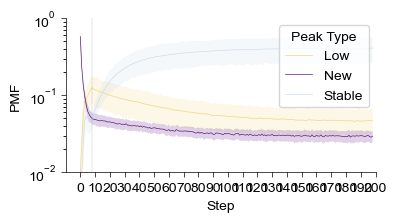

In [8]:
fig = plt.figure(figsize = (4, 2))
res['PMF'] = np.clip(res['PMF'], 0.01, 1)
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x="Step",
    y="PMF",
    data=res,
    hue="Peak Type",
    ax=ax,
    palette=['#F0D785', '#601986', '#CDDDEB'],
    linewidth=0.5,
    err_kws={"edgecolor": None}
)
ax.axvline(8, color='k', linewidth=0.1, ls='--')
ax.set_ylim(0.01, 1)
ax.set_xlim(-10, 200)
plt.semilogy()
ax.set_xticks(np.linspace(0, 200, 21))
plt.savefig(join(loc, "Peak Change with steps.png"), dpi=600)
plt.savefig(join(loc, "Peak Change with steps.svg"), dpi=600)

In [2]:
with open(join(figdata, code_id, "SFER General [1000 Sessions].pkl"), 'rb') as handle:
    predicted_prob, simu_reg, simu_identity = pickle.load(handle)

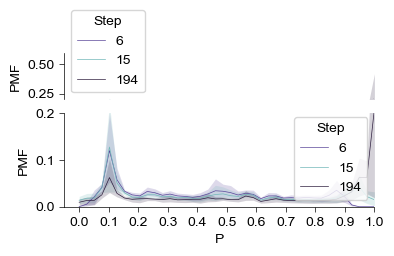

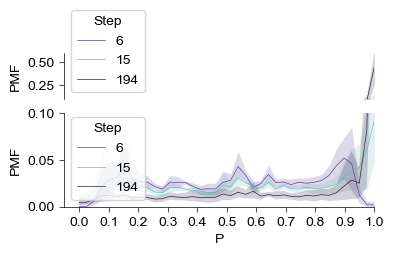

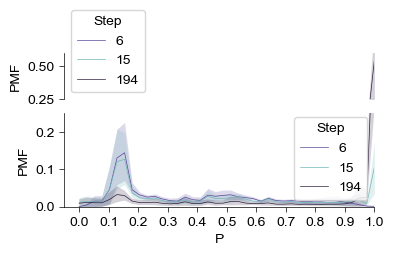

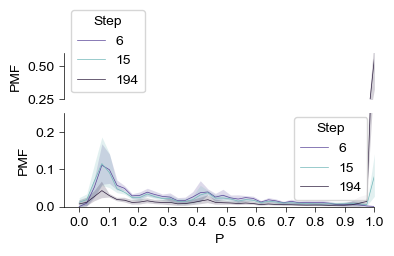

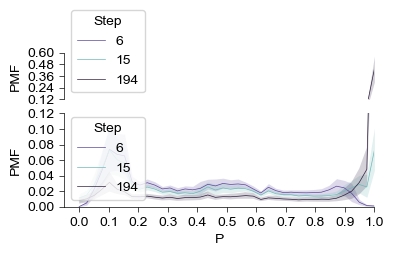

In [17]:
ymaxs = [0.2, 0.1, 0.25, 0.25]
for j, mouse in enumerate([10209, 10212, 10224, 10227]):
    idx = np.where((np.isin(Data['Step'], [6, 15, 194]))&
                        (Data['MiceID'] == mouse))[0]
    SubData = SubDict(Data, Data.keys(), idx)
    fig, axes = plt.subplots(figsize = (4, 2), ncols=1, nrows=2, gridspec_kw={'height_ratios': [1, 2]})
    ax = Clear_Axes(axes[1], ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
    ax2 = Clear_Axes(axes[0], ifyticks=True, close_spines=['top', 'right', 'bottom'])
    sns.lineplot(
            x="P",
            y="PMF",
            hue="Step",
            data=SubData,
            ax=ax,
            linewidth=0.5,
            palette=['#594599', '#70B7B8', '#2C1D3D'],
            err_kws={"linewidth": 0},
    )
    sns.lineplot(
            x="P",
            y="PMF",
            hue="Step",
            data=SubData,
            ax=ax2,
            linewidth=0.5,
            palette=['#594599', '#70B7B8', '#2C1D3D'],
            err_kws={"linewidth": 0},
    )
    ax.set_xlim(-0.05, 1)
    ax2.set_xlim(-0.05, 1)
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_ylim(0, ymaxs[j])
    ax2.set_ylim(ymaxs[j], 0.6)
    plt.savefig(join(loc, f'P distribution evolution - {mouse}.png') , dpi = 600)
    plt.savefig(join(loc, f'P distribution evolution - {mouse}.svg') , dpi = 600)
    plt.show()

idx = np.where((np.isin(Data['Step'], [6, 15, 194])))[0]
SubData = SubDict(Data, Data.keys(), idx)
fig, axes = plt.subplots(figsize = (4, 2), ncols=1, nrows=2, gridspec_kw={'height_ratios': [1, 2]})
ax = Clear_Axes(axes[1], ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
ax2 = Clear_Axes(axes[0], ifyticks=True, close_spines=['top', 'right', 'bottom'])
sns.lineplot(
            x="P",
            y="PMF",
            hue="Step",
            data=SubData,
            ax=ax,
            linewidth=0.5,
            palette=['#594599', '#70B7B8', '#2C1D3D'],
            err_kws={"linewidth": 0},
)
sns.lineplot(
            x="P",
            y="PMF",
            hue="Step",
            data=SubData,
            ax=ax2,
            linewidth=0.5,
            palette=['#594599', '#70B7B8', '#2C1D3D'],
            err_kws={"linewidth": 0},
)
ax.set_xlim(-0.05, 1)
ax2.set_xlim(-0.05, 1)
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_ylim(0, 0.12)
ax.set_yticks(np.linspace(0, 0.12, 7))
ax2.set_ylim(0.12, 0.6)
ax2.set_yticks(np.linspace(0.12, 0.6, 5))
plt.savefig(join(loc, f'P distribution evolution.png') , dpi = 600)
plt.savefig(join(loc, f'P distribution evolution.svg') , dpi = 600)
plt.show()

In [ ]:
mat = np.zeros((41, 998), np.float64)
for i in range(998):
    mat[:, i] = np.histogram(
        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False)[0], i],
        range=(-0.0125,1.0125),
        bins=41,
        density=True
    )[0]

mat_n = mat / np.max(mat, axis = 0)
fig = plt.figure(figsize = (8, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
im = ax.imshow(mat_n[:, 200], vmin = 0, vmax = 1, aspect='auto', interpolation=None)
plt.savefig(join(loc, "Pt Distribution Heatmap.svg"), dpi = 2400)
plt.savefig(join(loc, "Pt Distribution Heatmap.png"), dpi = 2400)

ax.set_yticks(np.linspace(0, 40, 9))
plt.colorbar(im, ax=ax)
ax.set_aspect("auto")
ax.set_xticks(np.linspace(0, 1000, 11))
ax.set_xlim([0, 1000])
ax.invert_yaxis()
plt.savefig(join(loc, "Distribution of Predicted Probability.svg"), dpi = 2400)
plt.savefig(join(loc, "Distribution of Predicted Probability.png"), dpi = 600)
plt.show()

fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
ax.plot(mat_n[:, 6], linewidth=0.5, color="black")
ax.set_xlim([-0.5, 40.5])
ax.set_xticks(np.linspace(0, 40, 9))
print(np.max(mat[:, 6])/40)
plt.savefig(join(loc, "Distribution of Predicted Probability [d7].svg"), dpi = 2400)
plt.savefig(join(loc, "Distribution of Predicted Probability [d7].svg"), dpi = 600)
plt.show()

fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
ax.plot(mat_n[:, 158], linewidth=0.5, color="black")
ax.set_xlim([-0.5, 40.5])
ax.set_xticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, "Distribution of Predicted Probability [d200].svg"), dpi = 2400)
plt.savefig(join(loc, "Distribution of Predicted Probability [d200].svg"), dpi = 600)
plt.show()

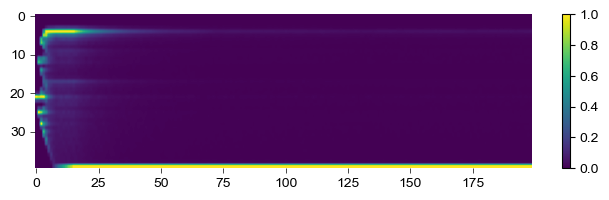

In [18]:
with open(join(datasaveloc, f'SFER_Poly2_Simulations_10227_MAf_iter0.pkl'), 'rb') as handle:
    predicted_prob, simu_reg, simu_identity = pickle.load(handle)
    
mat = np.zeros((40, 199), np.float64)
for i in range(199):
    mat[:, i] = np.histogram(
        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False)[0], i],
        range=(1e-10, 1),
        bins=40,
        density=True
    )[0]

mat_n = mat / np.max(mat, axis = 0)
fig = plt.figure(figsize = (8, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
im = ax.imshow(mat_n[:, :200], vmin = 0, vmax = 1, aspect='auto', interpolation=None)
plt.colorbar(im, ax = ax)
plt.savefig(join(loc, "Pt Distribution Heatmap.svg"), dpi = 2400)
plt.savefig(join(loc, "Pt Distribution Heatmap.png"), dpi = 2400)
plt.show()

Iteration Time: 10209, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 632.76it/s]


Iteration Time: 10209, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 505.83it/s]


Iteration Time: 10209, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 560.53it/s]


Iteration Time: 10212, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1838.95it/s]


Iteration Time: 10212, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 1803.32it/s]


Iteration Time: 10212, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 532.81it/s]


Iteration Time: 10224, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 474.23it/s]


Iteration Time: 10224, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 431.91it/s]


Iteration Time: 10227, MA | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 413.20it/s]


Iteration Time: 10227, MB | Iteration 0


100%|██████████| 199/199 [00:00<00:00, 668.73it/s]


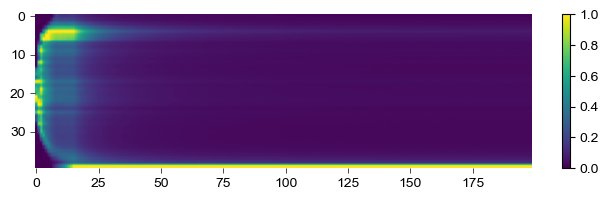

In [19]:
overall_mat = np.zeros((40, 199), np.float64)
for j in range(len(f_CellReg_modi)):
    if f_CellReg_modi['Type'][j] != 'Real' or f_CellReg_modi['maze_type'][j] == 0:
        continue
        
    mouse = int(f_CellReg_modi['MiceID'][j])
    if f_CellReg_modi['paradigm'][j] == 'CrossMaze':
        paradigm = 'MA' if f_CellReg_modi['maze_type'][j] == 1 else 'MB'
            
        for k in range(1):
            print(f"Iteration Time: {mouse}, {paradigm} | Iteration {k}")
            
            with open(join(datasaveloc, f'SFER_Poly2_Simulations_{mouse}_{paradigm}_iter{k}.pkl'), 'rb') as handle:
                #pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
                predicted_prob, simu_reg, simu_identity = pickle.load(handle)

            mat = np.zeros((40, 199), np.float64)
            for i in tqdm(range(199)):
                mat[:, i] = np.histogram(
                        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                        range=(1e-10, 1),
                        bins=40,
                        density=True
                )[0]
        
                overall_mat += mat
    else:
        for i in ["cis", "trs"]:
            if f_CellReg_modi['paradigm'][j] == 'ReverseMaze':
                paradigm = 'MAf' if i == 'cis' else "MAb"
            else:
                paradigm = 'HPf' if i == 'cis' else "HPb"
            
            with open(join(datasaveloc, f'SFER_Poly2_Simulations_{mouse}_{paradigm}_iter{k}.pkl'), 'rb') as handle:
                #pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
                predicted_prob, simu_reg, simu_identity = pickle.load(handle)

            mat = np.zeros((40, 199), np.float64)
            for i in tqdm(range(199)):
                mat[:, i] = np.histogram(
                    predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                    range=(1e-10, 1),
                            bins=40,
                            density=True
                )[0]
        
                overall_mat += mat


mat_n = overall_mat / np.max(overall_mat, axis = 0)
fig = plt.figure(figsize = (8, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
im = ax.imshow(mat_n[:, :200], vmin = 0, vmax = 1, aspect='auto', interpolation=None)
plt.colorbar(im, ax = ax)
plt.savefig(join(loc, "Pt Distribution Heatmap.svg"), dpi = 2400)
plt.savefig(join(loc, "Pt Distribution Heatmap.png"), dpi = 2400)
plt.show()

In [ ]:
PermanentSilent = np.zeros(predicted_prob.shape[1])
for i in range(predicted_prob.shape[1]):
    idx = np.where((np.nansum(simu_identity[:, :i+1], axis=1) >= 1) & (np.isnan(simu_identity[:, i+1]) == True))[0]
    PermanentSilent[i] = idx.shape[0]

        E:\Data\FinalResults\0344 - Convergent Dynamics is already existed!


100%|██████████| 68/68 [03:25<00:00,  3.03s/it]


0 198


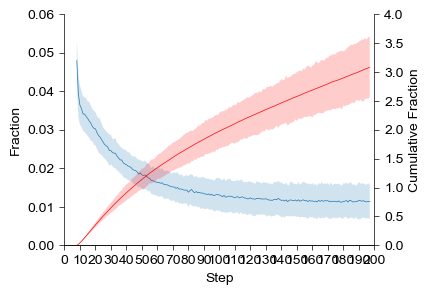

In [20]:
from mylib.statistic_test import *

code_id = '0344 - Convergent Dynamics'
loc = os.path.join(figpath, code_id)
mkdir(loc)
from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import FeatureKnockOut
file_loc = join(figpath, "0346 - GLM for all sessions")

if exists(join(figdata, code_id+'[All Mice].pkl')):
    with open(join(figdata, code_id+'[All Mice].pkl'), 'rb') as handle:
        SData = pickle.load(handle)
        
    for k in SData.keys():
        print(SData[k].shape)
else:
    SData = {
        "Step": [],
        "Fraction": [],
        "Cumulative Fraction": [],
        "MiceID": [],
        "Paradigm": []
    }
    
    for k in tqdm(range(len(f_CellReg_modi))):
        if f_CellReg_modi['Type'][k] != 'Real' or f_CellReg_modi['maze_type'][k] == 0:
            continue
        
        with open(f_CellReg_modi['Trace File'][k], 'rb') as handle:
            trace = pickle.load(handle)  
              
        if f_CellReg_modi['paradigm'][k] == 'CrossMaze':
            paradigm = 'MA' if f_CellReg_modi['maze_type'][k] == 1 else 'MB'

            
            if 'simu_reg_200' in trace.keys():
                simu_reg, simu_identity = trace['simu_reg_200'], trace['simu_identity_200']
            else:
                with open(join(file_loc, f'{int(f_CellReg_modi["MiceID"][k])}_{paradigm}.pkl'), 'rb') as handle:
                    res = pickle.load(handle)
            
                M53: ContinuousHiddenStateModel = res[-5]
                simu_reg, simu_identity = M53.simulate_across_day(200, n_fields=10000)
            
                trace['simu_reg_200'] = simu_reg
                trace['simu_identity_200'] = simu_identity
            
                with open(f_CellReg_modi['Trace File'][k], 'wb') as handle:
                    pickle.dump(trace, handle)
            
            drifted_field = np.zeros(simu_reg.shape[1]-1)
            total_drifted_field = np.zeros(simu_reg.shape[1]-1)
            for j in range(drifted_field.shape[0]-1):
                idx = np.where(
                    (np.isnan(simu_identity[:, j+1]) == True) & (np.isnan(simu_identity[:, j]) == False)
                )[0]
                
                denominator = np.where((np.isnan(simu_identity[:, j+1]) == False))[0].shape[0]
                
                if denominator > 0:
                    drifted_field[j] = idx.shape[0] / denominator
                    
                idx2 = np.where(
                    (np.isnan(simu_identity[:, j+1]) == True) & (np.nansum(simu_reg[:, :j+1], axis=1) > 1)
                )[0]
                
                total_drifted_field[j] = idx2.shape[0] / denominator
                
            SData['Step'].append(np.arange(drifted_field.shape[0]))
            SData['Fraction'].append(drifted_field)
            SData['MiceID'].append(np.repeat(f_CellReg_modi['MiceID'][k], drifted_field.shape[0]))
            SData['Paradigm'].append(np.repeat(paradigm, drifted_field.shape[0]))
            SData['Cumulative Fraction'].append(total_drifted_field)
                          
        else:
            info = {"ReverseMaze": ["MAf", "MAb"], "HairpinMaze": ["HPf", "HPb"]}
            directions = ['cis', 'trs']
            for n, paradigm in enumerate(info[f_CellReg_modi['paradigm'][k]]):
                
                if 'simu_reg_200' in trace[directions[n]].keys():
                    simu_reg, simu_identity = trace[directions[n]]['simu_reg_200'], trace[directions[n]]['simu_identity_200']
                else:
                    with open(join(file_loc, f'{int(f_CellReg_modi["MiceID"][k])}_{paradigm}.pkl'), 'rb') as handle:
                        res = pickle.load(handle)
                
                    M53: ContinuousHiddenStateModel = res[-5]
                    simu_reg, simu_identity = M53.simulate_across_day(200, n_fields=10000)
            
                    trace[directions[n]]['simu_reg_200'] = simu_reg
                    trace[directions[n]]['simu_identity_200'] = simu_identity
            
                    with open(f_CellReg_modi['Trace File'][k], 'wb') as handle:
                        pickle.dump(trace, handle)
            
                drifted_field = np.zeros(simu_reg.shape[1]-1)
                total_drifted_field = np.zeros(simu_reg.shape[1]-1)
                for j in range(drifted_field.shape[0]-1):
                    idx = np.where(
                        (np.isnan(simu_identity[:, j+1]) == True) & (np.isnan(simu_identity[:, j]) == False)
                    )[0]
                
                    denominator = np.where((np.isnan(simu_identity[:, j+1]) == False))[0].shape[0]
                
                    if denominator > 0:
                        drifted_field[j] = idx.shape[0] / denominator
                        
                    idx2 = np.where(
                        (np.isnan(simu_identity[:, j+1]) == True) & (np.nansum(simu_reg[:, :j+1], axis=1) > 1)
                    )[0]
                
                    total_drifted_field[j] = idx2.shape[0] / denominator
                
                SData['Step'].append(np.arange(drifted_field.shape[0]))
                SData['Fraction'].append(drifted_field)
                SData['MiceID'].append(np.repeat(f_CellReg_modi['MiceID'][k], drifted_field.shape[0]))
                SData['Paradigm'].append(np.repeat(paradigm, drifted_field.shape[0]))
                SData['Cumulative Fraction'].append(total_drifted_field)
                
                    
    for k in SData.keys():
        SData[k] = np.concatenate(SData[k])
        
    with open(join(figdata, code_id+'[All Mice].pkl'), 'wb') as handle:
        pickle.dump(SData, handle)
    
    SD = pd.DataFrame(SData)
    SD.to_excel(join(figdata, code_id+'[All Mice].xlsx'), index=False)

print(np.min(SData['Step']), np.max(SData['Step']))
idx = np.where((SData['Step'] >= 8) & (SData['Step'] <= 197))[0]
SubData = SubDict(SData, SData.keys(), idx)
fig = plt.figure(figsize=(4, 3))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x='Step',
    y='Fraction',
    data=SubData,
    ax=ax,
    linewidth=0.5,
    err_kws={"edgecolor": None}
)
ax.set_xlim([0, 200])
ax.set_xticks(np.linspace(0, 200, 21))
ax.set_ylim([0, 0.06])

twin = Clear_Axes(ax.twinx(), ifxticks=True, ifyticks=True, close_spines=['top', 'left'])
sns.lineplot(
    x='Step',
    y='Cumulative Fraction',
    data=SubData,
    ax=twin,
    linewidth=0.5,
    err_kws={"edgecolor": None},
    color='red'
)
twin.set_ylim([0, 4])
plt.savefig(join(loc, "Convergently Drift Rate.svg"), dpi = 2400)
plt.savefig(join(loc, "Convergently Drift Rate.png"), dpi = 2400)

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        E:\Data\FinalResults\0344 - Convergent Dynamics is already existed!
Using device: cuda
Using device: cuda
Using device: cuda


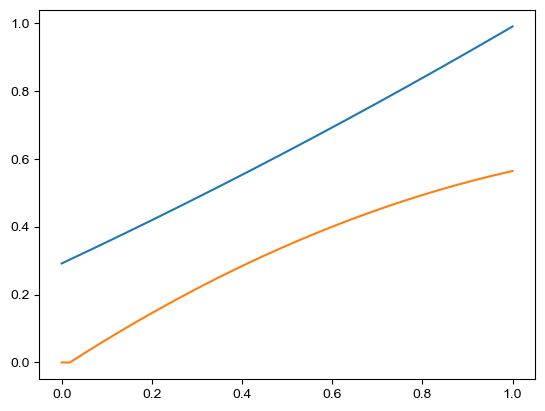

        E:\Data\FigData\0344 - Convergent Dynamics is already existed!
Iteration Time: 15


100%|██████████| 199/199 [00:00<00:00, 4913.04it/s]


Iteration Time: 16


100%|██████████| 199/199 [00:00<00:00, 6778.91it/s]


Iteration Time: 17


100%|██████████| 199/199 [00:00<00:00, 4792.86it/s]


Iteration Time: 18


100%|██████████| 199/199 [00:00<00:00, 4067.02it/s]


Iteration Time: 19


100%|██████████| 199/199 [00:00<00:00, 4926.15it/s]


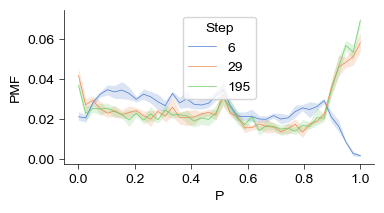

In [1]:
from mylib.statistic_test import *

code_id = '0344 - Convergent Dynamics'
loc = os.path.join(figpath, code_id)
mkdir(loc)

with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    template_seq = pickle.load(handle)

from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import FeatureKnockOut

with open(join(figpath, "0346 - GLM for all sessions", "10224_MA_iter1.pkl"), 'rb') as handle:
    models = pickle.load(handle)

M53: ContinuousHiddenStateModel = models[0][-5]

x = np.linspace(0, 1, 1000)
y1 = M53.predict(1, x)
y2 = M53.predict(0, x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

def func(M53 = M53):
    simu_reg, simu_identity, predicted_prob = M53.simulate_across_day(
        n_step=200, n_fields=1000, is_noise=True, is_gated=True
    )
    
    return predicted_prob, simu_reg, simu_identity

datasaveloc = join(figdata, code_id)
mkdir(datasaveloc)

if exists(join(datasaveloc, ' [No Gate Pt Distribution].pkl')):
    with open(join(datasaveloc, '[No Gate Pt Distribution].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = {
        "Iteration": [],
        "Step": [],
        "P": [],
        "PMF": []
    }
    
    for j in range(15, 20):
        print(f"Iteration Time: {j}")
        predicted_prob, simu_reg, simu_identity = func()
        with open(join(datasaveloc, f'SFER General {j}.pkl'), 'wb') as handle:
            pickle.dump((predicted_prob, simu_reg, simu_identity), handle)
            #predicted_prob, simu_reg, simu_identity = pickle.load(handle)

        mat = np.zeros((40, 199), np.float64)
        for i in tqdm(range(199)):
            mat[:, i] = np.histogram(
                predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False), i],
                range=(0,1),
                bins=40,
                density=True
            )[0]
        
            Data["Iteration"].append(np.repeat(j, 40))
            Data["Step"].append(np.repeat(i, 40))
            Data["P"].append(np.linspace(0, 1, 40))
            Data["PMF"].append(mat[:, i] / np.sum(mat[:, i]))
    
    for k in Data.keys():
        Data[k] = np.concatenate(Data[k])
        
    with open(join(datasaveloc, '[No Gate Pt Distribution].pkl'), 'wb') as handle:
        pickle.dump(Data, handle)
    
    D = pd.DataFrame(Data)
    D.to_excel(join(datasaveloc, '[No Gate Pt Distribution].xlsx'), index=False)
    
idx = np.where(np.isin(Data['Step'], [6, 29, 195]))[0]
SubData = SubDict(Data, Data.keys(), idx)
fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x="P",
    y="PMF",
    hue="Step",
    data=SubData,
    ax=ax,
    linewidth=0.5,
    err_kws={"linewidth": 0},
    palette="muted",
)
plt.savefig(join(loc, 'P distribution evolution [no gate].png') , dpi = 600)
plt.savefig(join(loc, 'P distribution evolution [no gate].svg') , dpi = 600)
plt.show()

In [2]:
n_steps = np.max(Data['Step']) + 1

res = {"Step": [], "PMF": [], "Peak Type": []}
line = np.zeros((n_steps, 3))
for j in range(5):
    for i in range(1, n_steps):
        idx1 = np.where((Data['Iteration'] == j)&(Data['Step'] == i)&(Data['P'] <= 0.2))[0]
        idx2 = np.where((Data['Iteration'] == j)&(Data['Step'] == i)&(Data['P'] < 0.6)&(Data['P'] >= 0.4))[0]
        idx3 = np.where((Data['Iteration'] == j)&(Data['Step'] == i)&(Data['P'] >= 0.8))[0]
        a = np.max(Data['PMF'][idx1])
        b = np.max(Data['PMF'][idx2])
        c = np.max(Data['PMF'][idx3])
        res['Step'].append(np.repeat(i, 3))
        res['PMF'].append(np.array([a, b, c]))
        res['Peak Type'].append(np.array(["Low", "New", "Stable"]))

for k in res.keys():
    res[k] = np.concatenate(res[k])

fig = plt.figure(figsize = (4, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True, close_spines=['top', 'right'])
sns.lineplot(
    x="Step",
    y="PMF",
    data=res,
    hue="Peak Type",
    ax=ax,
    palette=['#F0D785', '#601986', '#CDDDEB'],
    linewidth=0.5,
    err_kws={"edgecolor": None}
)
ax.set_ylim(0, 0.1)
ax.set_xlim(0, 200)
ax.set_xticks(np.linspace(0, 200, 21))
plt.savefig(join(loc, "Peak Change with steps [no gate].png"), dpi=600)
plt.savefig(join(loc, "Peak Change with steps [no gate].svg"), dpi=600)

ValueError: zero-size array to reduction operation maximum which has no identity

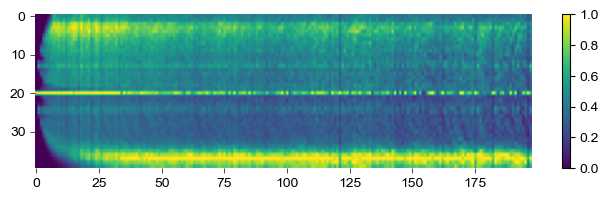

In [4]:
with open(join(datasaveloc, f'SFER General {16}.pkl'), 'rb') as handle:
    predicted_prob, simu_reg, simu_identity = pickle.load(handle)
    
mat = np.zeros((40, 198), np.float64)
for i in range(198):
    mat[:, i] = np.histogram(
        predicted_prob[np.where(np.isnan(predicted_prob[:, i]) == False)[0], i],
        range=(0, 1),
        bins=40,
        density=True
    )[0]

mat_n = mat / np.max(mat, axis = 0)
fig = plt.figure(figsize = (8, 2))
ax = Clear_Axes(plt.axes(), ifxticks=True, ifyticks=True)
im = ax.imshow(mat_n[:, :200], vmin = 0, vmax = 1, aspect='auto', interpolation=None)
plt.colorbar(im, ax = ax)
plt.savefig(join(loc, "Pt Distribution Heatmap [no gate].svg"), dpi = 2400)
plt.savefig(join(loc, "Pt Distribution Heatmap [no gate].png"), dpi = 2400)
plt.show()